In [1]:
#! /usr/bin/env python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [2]:
class mosaic:
    def __init__(self,file):
        im = Image.open(file) # Lê a imagem de entrada
        self.width, self.height = im.size
        self.original = self.image = np.array(im, dtype="uint8") #  Converte a imagem como array numpy

    def interpolation(self, K):
        output = np.zeros((int(self.width*K), int(self.height*K)), "uint8")
        for i in range(0,K*(self.width-1),K):
            for j in range(0,K*(self.height-1),K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[int(i/K)][int(j/K)]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def downsampling(self, K):
        output = np.zeros((int(self.width/K), int(self.height/K)), "uint8")
        for i in range(0,self.width, K):
            for j in range(0, self.height, K):
                output[int(i/K)][int(j/K)] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def granulate(self, K):
        output = np.zeros((self.width, self.height), "uint8")
        for i in range(0,self.width-K,K):
            for j in range(0,self.height-K,K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

### Conversão para escala de cinza

In [3]:
rgb = Image.open('lena.png')

gs = rgb.convert(mode='L')

In [4]:
gs.save('lena_gs.png')

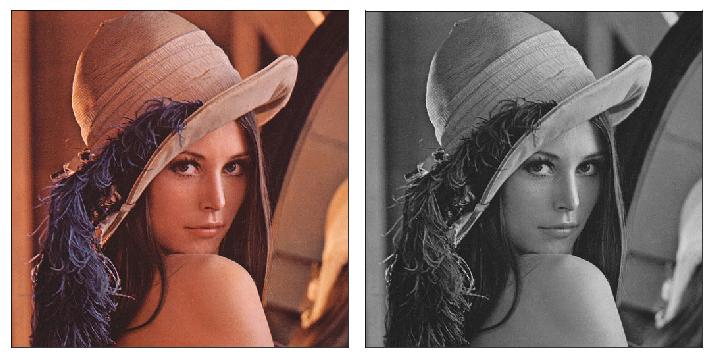

In [5]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(rgb)


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(gs.convert('RGBA'))

plt.tight_layout()

plt.show()

In [7]:
lena = mosaic('lena_gs.png')

In [8]:
lena.granulate(8)

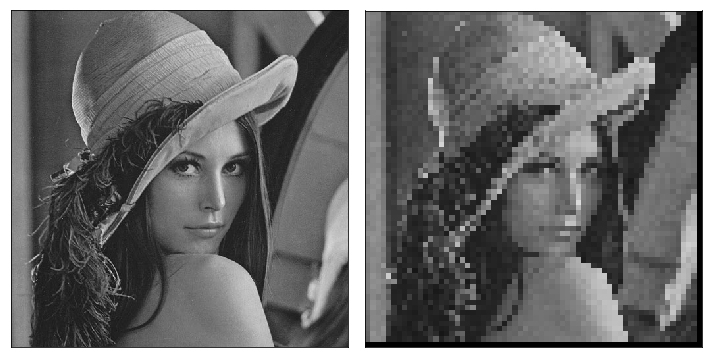

In [9]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(gs.convert('RGBA'))


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(lena.out.convert('RGBA'))

plt.tight_layout()

plt.show()

In [16]:
import os
import os.path as path

In [28]:
samples = []
for i, sample in enumerate(os.listdir('samples/')):
    if path.isdir(sample):
        continue
    else:
        samples.insert(i, Image.open(path.join('samples/', sample)).resize(size=(128, 128)))

In [108]:
def average_color(sample):
    pix = sample.load()
    totals = [0.0, 0.0, 0.0]
    for y in range(sample.size[1]):
        for x in range(sample.size[0]):
            color = pix[x,y]
            for c in range(3):
                totals[c] += color[c] ** 2.2
    count = sample.size[0] * sample.size[1]
    color = tuple(int(round((totals[c] / count) ** (1/2.2))) for c in range(3))
    return color

In [109]:
colors = []
for i, sample in enumerate(samples):
    colors.insert(i, average_color(sample))

In [121]:
colors = np.array(colors, dtype='uint8').reshape(1, 20, 3)

In [123]:
rgb = Image.fromarray(np.array(colors, dtype='uint8'), mode='RGB')

In [177]:
hsl = np.array(rgb.convert(mode='HSV'))
hsl = np.array(sorted(hsl[0], key=lambda p: p[2])).reshape(1, 20, 3)
rgb_scale = Image.fromarray(np.repeat(hsl, 2, axis=0), mode='HSV').convert(mode='RGB')
i_scale = Image.fromarray(np.repeat(hsl[...,2], 2, axis=0), mode='L')

In [178]:
labels = [i for i in hsl[..., 2].flat]
index = np.arange(0, 20)

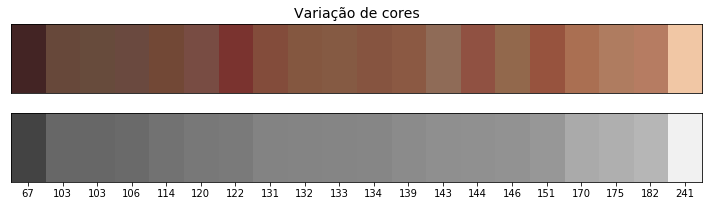

In [197]:
fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(211)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklines(), visible=False)
plt.yticks([])
ax1.set_title('Variação de cores', fontsize=14)
ax1.imshow(rgb_scale)


ax2 = fig.add_subplot(212)
plt.xticks(index, labels)
plt.yticks([])
ax2.imshow(i_scale)


plt.tight_layout()

plt.show()